# Qno2

In [ ]:
import pandas as pd

In [1]:
data = pd.read_csv('data.csv')
data = data.drop(['fruit_name', 'fruit_subtype'], axis=1)
data = data.fillna(data.mean())

NameError: name 'pd' is not defined

In [10]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('fruit_label', axis=1), data['fruit_label'], test_size=0.20, random_state=0)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [11]:
results = {}
for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[k] = accuracy

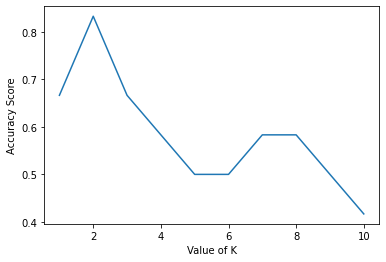

In [12]:
import matplotlib.pyplot as plt
plt.plot(list(results.keys()), list(results.values()))
plt.xlabel('Value of K')
plt.ylabel('Accuracy Score')
plt.show()

# Qno1

In [ ]:
import numpy as np
from collections import Counter

In [16]:
class KNN:
    def __init__(self, k=3):
        self.k = k
       
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
       
    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)
   
    def _predict(self, x):
        distances = [np.sqrt(np.sum((x - x_train)**2)) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]

In [17]:
X_train = np.array([[1, 2], [2, 4], [3, 6], [4, 8]])
y_train = np.array([0, 0, 1, 1])

X_test = np.array([[1.5, 3], [3.5, 6.5], [4.5, 8.5]])

In [18]:
knn = KNN(k=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(y_pred)

[0 1 1]
